In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import random 
%matplotlib inline
import pylab

Ejercicio 3 Considere que Y tiene distribución Beta($\alpha, \beta$), es decir la densidad es la siguiente

\begin{equation}
f_{Y}(y)= \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)}  y^{\alpha -1} (1-y)^{\beta-1} \mathbb{1}_{(0,1)}(y)
\end{equation}

Y además $X|Y=y$ tiene la siguiente función de densidad

\begin{equation}
f(x|y)= \frac{y}{\sqrt{2 \pi}} e^{\frac{-x^{2}}{2}} + \frac{1-y}{\sqrt{2 \pi}} e^{\frac{-(x-8)^{2}}{4}}
\end{equation}

3.1. Haga un algoritmo para simular observaciones del vector aleatorio $(X, Y)$, prográmalo y haga una gráfica
con los puntos $(X,Y)$ para $\alpha = 2.5$ y $\beta = 2.2$, con un total de 1, 000, 000 de observaciones

In [1]:
def GeneraGamma(alpha,theta):
    a = mt.floor(alpha)
    valor = 0
    v = 1
    contador = 1
    while valor <= v :
        U=np.random.rand(a)
        n=len(U)
        y= -(alpha/a)*(sum (mt.log(U[i]) for i in range(n)))
        v = random.random()
        valor = ((y*mt.exp(-(y+alpha)/alpha))/alpha)**(alpha-a)
    w=y/theta
    return w

In [3]:
def GeneraBeta(alpha,beta,tetha,N):
    Simulaciones=[]
    for i in range(N):
        w = GeneraGamma(alpha,tetha)
        z = GeneraGamma(beta,tetha)
        Simulaciones.append((w)/(w+z))
    return Simulaciones

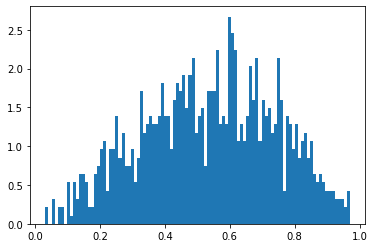

In [13]:
muestra_beta = GeneraBeta(2.5,2.2,1,1000)
pylab.hist(muestra_beta, bins=100, density=True)
pylab.show()

In [14]:
def decide(w):
    u = random.random()
    v = random.random()
    x = (-2*mt.log(u))**(1/2) * mt.sin(2*mt.pi*v)
    y = (-2*mt.log(u))**(1/2) * mt.cos(2*mt.pi*v)
    if(x > w):
        return x
    else:
        return ((2*y)+8)

In [15]:
def simulaMezcla(N):
    simulacion = []
    for i in range(N):
        u = random.random()
        simulacion.append(decide(u))
    return simulacion

In [16]:
muestra_mezcla = simulaMezcla(1000)

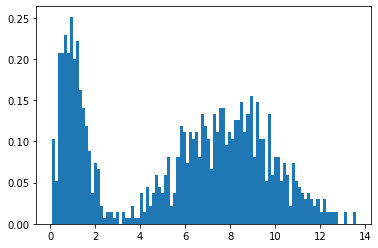

In [17]:
pylab.hist(muestra_mezcla, bins=100, density=True)
pylab.show()

In [18]:
len(muestra_mezcla)==len(muestra_beta)

True

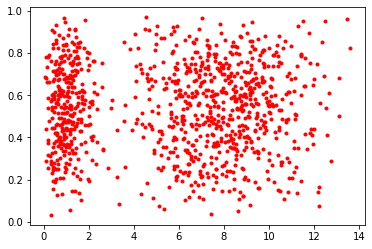

In [20]:
pylab.plot(muestra_mezcla, muestra_beta, ".",color="red", label='Densidad')
pylab.show()

3.2. Calcula explícitamente la marginal de X y haz un nuevo algoritmo para simular esta variable, prográmalo
y haga un histograma con un total de 1, 000, 000 de observaciones, compárelo con su densidad real